## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Step One. First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

In [11]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')
print (images)
# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
        
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(5000)

cv2.destroyAllWindows()

['../camera_cal\\calibration1.jpg', '../camera_cal\\calibration10.jpg', '../camera_cal\\calibration11.jpg', '../camera_cal\\calibration12.jpg', '../camera_cal\\calibration13.jpg', '../camera_cal\\calibration14.jpg', '../camera_cal\\calibration15.jpg', '../camera_cal\\calibration16.jpg', '../camera_cal\\calibration17.jpg', '../camera_cal\\calibration18.jpg', '../camera_cal\\calibration19.jpg', '../camera_cal\\calibration2.jpg', '../camera_cal\\calibration20.jpg', '../camera_cal\\calibration3.jpg', '../camera_cal\\calibration4.jpg', '../camera_cal\\calibration5.jpg', '../camera_cal\\calibration6.jpg', '../camera_cal\\calibration7.jpg', '../camera_cal\\calibration8.jpg', '../camera_cal\\calibration9.jpg']
[[234 235 199 ..., 115 129 153]
 [233 188 150 ..., 196 157 109]
 [201 146 194 ..., 226 213 170]
 ..., 
 [ 20 139 205 ..., 204 200 206]
 [ 17  91 205 ..., 196 202 202]
 [ 22  14 118 ..., 199 200 115]]
False
None
[[215 217 182 ..., 112 129 146]
 [215 168 139 ..., 137 122 110]
 [183 138 144

## Step Two. Apply a distortion correction to raw images.

In [12]:
# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

In [20]:
index = 1;
for fname in images:
    img = cv2.imread(fname)
    undistorted = cal_undistort(img, objpoints, imgpoints)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(undistorted)
    ax2.set_title('Undistorted Image', fontsize=50)
    #plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

    plt.savefig('figure' + str(index) + '.jpg', bbox_inches='tight')
    index +=1

## Example of the calibration1.jpg - Original and Undistorted Image 

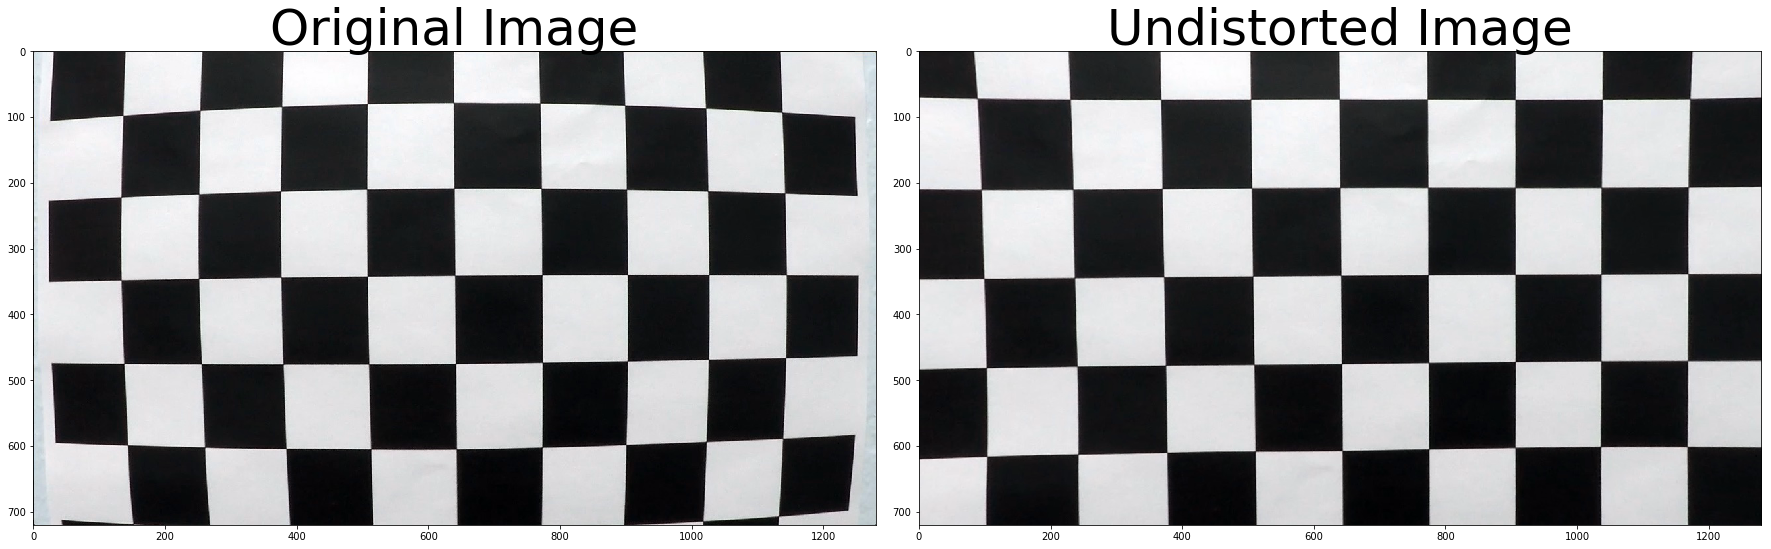

In [22]:
%matplotlib inline
image2 = images[0]
img = cv2.imread(image2)
undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [24]:
print (imgpoints)

[array([[[ 545.32281494,  343.05032349]],

       [[ 602.67919922,  342.82681274]],

       [[ 660.09796143,  341.28921509]],

       [[ 715.83911133,  340.73129272]],

       [[ 770.56072998,  339.98654175]],

       [[ 823.46490479,  339.20251465]],

       [[ 874.27630615,  338.48022461]],

       [[ 925.06335449,  337.35388184]],

       [[ 972.56884766,  336.60717773]],

       [[ 542.59509277,  393.76373291]],

       [[ 600.19744873,  392.54690552]],

       [[ 655.3460083 ,  392.10684204]],

       [[ 711.13751221,  390.68212891]],

       [[ 763.534729  ,  388.46170044]],

       [[ 815.56463623,  387.05966187]],

       [[ 866.3972168 ,  385.45394897]],

       [[ 913.71691895,  384.51980591]],

       [[ 961.51293945,  382.39074707]],

       [[ 541.29772949,  443.60562134]],

       [[ 597.05865479,  441.94219971]],

       [[ 650.73400879,  440.41171265]],

       [[ 704.78216553,  437.89492798]],

       [[ 757.32250977,  435.96392822]],

       [[ 807.64978027,  432.8455

## Step Three. Use color transforms, gradients, etc., to create a thresholded binary image.

## Step Four. Apply a perspective transform to rectify binary image ("birds-eye view").

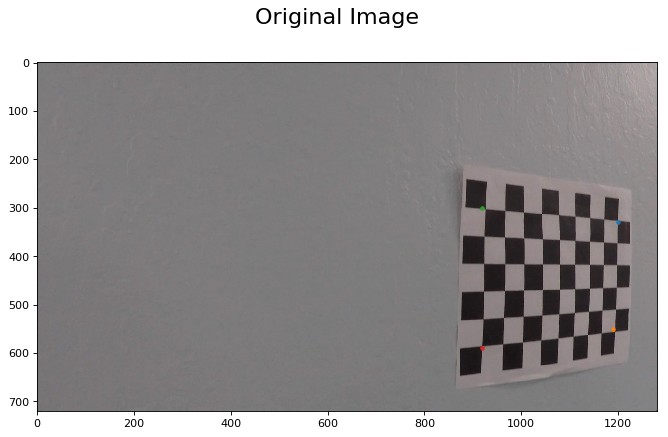

In [42]:
%matplotlib inline

image7 = cv2.imread(images[6])

plt.figure(figsize=(10, 6), dpi=80)
plt.suptitle('Original Image', fontsize=20)
plt.plot(1200,330,'.') # top right
plt.plot(1190,550,'.') # bottom right

plt.plot(920,300,'.') # top left
plt.plot(920,590,'.') # bottom left

plt.imshow(image7)

In [48]:
# Define perspective transform function
# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M

In [65]:
%matplotlib qt


def warped(img, nx, ny, mtx, dist):
    
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)
    # Return the resulting image and matrix
    return warped, M

In [66]:
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y
image7 = cv2.imread(images[6])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
top_down, perspective_M = corners_unwarp(image7, nx, ny, mtx, dist)

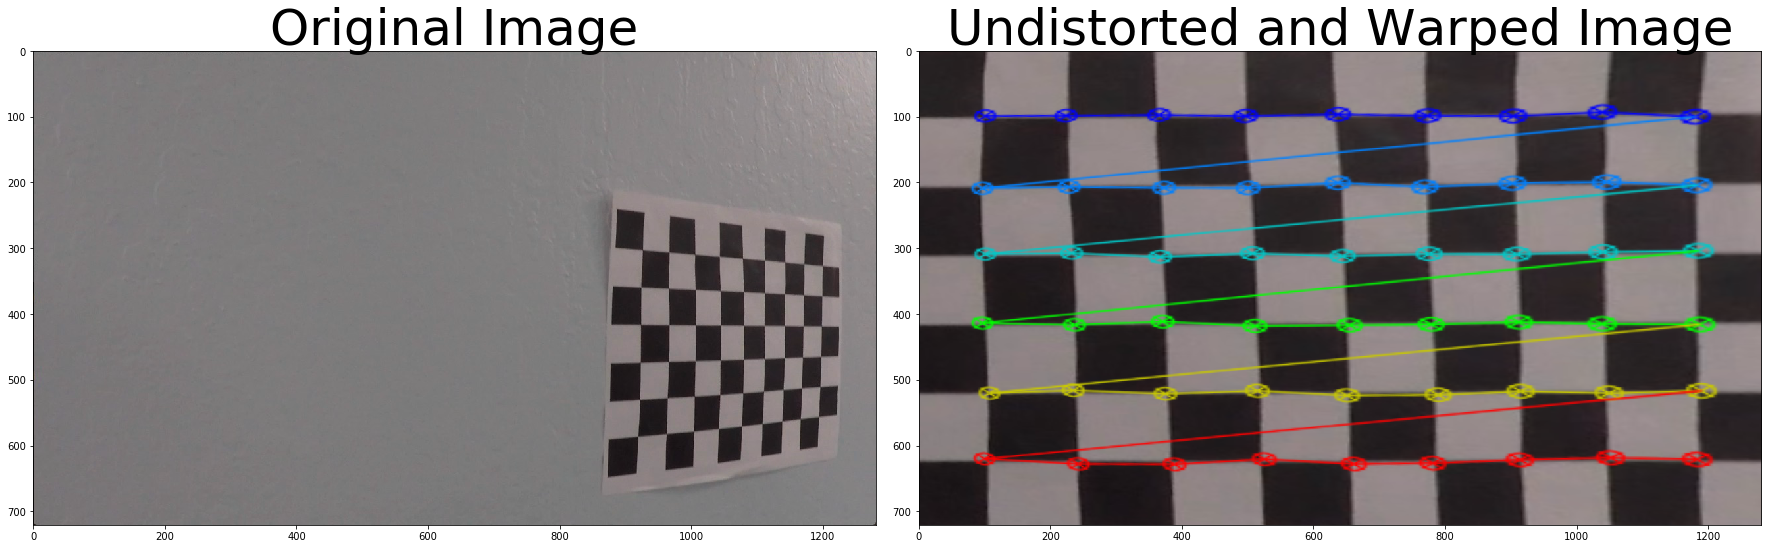

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image7)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)